In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfl
import cv2
from sklearn.model_selection import train_test_split

from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
np.random.seed(2)

In [2]:
data_Y_total = np.loadtxt('Blood Cells/dataset-master/dataset-master/labels_cleaned.csv', str)

In [3]:
def construct_Y(data):
    
    n = len(data)
    num_features = 0
    
    for i in range(len(data[0])):
        if(data[0][i] == ","):
            num_features += 1
    
    Y_ints = np.zeros(n)
    Y_labels = np.zeros(n, dtype = 'str')
    for i in range(n):
        arr = data[i].split(",")
        Y_ints[i] = arr[1]
        Y_labels[i] = arr[2]
            
    return Y_ints.T, Y_labels
    

In [4]:
def contruct_data_array(data_Y_ints_pre, data_Y_labels_pre):
    L = len(data_Y_ints_pre)    
    img_array = []
    data_Y_ints = []
    data_Y_labels = []
    for index in range(L):
        i = data_Y_ints_pre[index]
        if(i < 10):
            filename = f'Blood Cells/dataset-master/dataset-master/JPEGImages/BloodImage_0000{int(i)}.jpg'
        elif(i>=10 and i<100):
            filename = f'Blood Cells/dataset-master/dataset-master/JPEGImages/BloodImage_000{int(i)}.jpg'
        elif(i>=100 and i<1000):
            filename = f'Blood Cells/dataset-master/dataset-master/JPEGImages/BloodImage_00{int(i)}.jpg'

        img = cv2.imread(filename)
        if img is None:
            print(index)
            continue
        else:
            img_standard = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array.append(img_standard)
        data_Y_ints.append(data_Y_ints_pre[index])
        data_Y_labels.append(data_Y_labels_pre[index])
    return img_array, data_Y_ints, data_Y_labels

In [5]:
def convert_2_np(img_array, data_Y_labels):
    L = len(img_array)
    h = img_array[0].shape[0]
    w = img_array[0].shape[1]
    
    img_array_np     = np.zeros((L, h, w, 3), dtype = int)
    data_Y_labels_np = np.zeros((L), dtype = str)
    
    for i in range(L):
        img_array_np[i] = img_array[i]
        data_Y_labels_np[i] = data_Y_labels[i]
        
    return img_array_np, data_Y_labels_np

In [6]:
def split_train_test(data, num_train):
    
    train = data[0:num_train]
    test  = data[num_train:]
    
    return train, test

In [7]:
def one_hot_encoding(data):
    L = len(data)
    Y = np.zeros((L, 5))
    
    for i in range(L):
        if(data[i] == 'N'):
            Y[i][0] = 1
        elif(data[i] == 'B'):
            Y[i][1] = 1
        elif(data[i] == 'E'):
            Y[i][2] = 1
        elif(data[i] == 'M'):
            Y[i][3] = 1
        elif(data[i] == 'L'):
            Y[i][4] = 1
    
    return Y

In [8]:
def data_augmentation(X_data, Y_data, num_augment_list, type_array = 'list'):
    
    if(type_array == 'list'):
        
        L = len(X_data)
        for i in range(L):

            img   = X_data[i]
            
            if(Y_data[i] == 'N'):
                num_augment = num_augment_list[0]
            elif(Y_data[i] == 'E'):
                num_augment = num_augment_list[1]
            elif(Y_data[i] == 'L'):
                num_augment = num_augment_list[2]    
            elif(Y_data[i] == 'M'):
                num_augment = num_augment_list[3]
            elif(Y_data[i] == 'B'):
                num_augment = num_augment_list[4]
                
            for j in range(num_augment):
                new_img1 = layers.RandomFlip('horizontal_and_vertical')(img)
                new_img  = layers.RandomRotation(1)(new_img1)

                X_data.append(new_img)
                Y_data.append(Y_data[i])

                print(i, j)
        return X_data, Y_data
    else:
        L = len(X_data)
        h = X_data[0].shape[0]
        w = X_data[0].shape[1]

        X_data_new     = np.zeros((L + (L*num_augment) , h, w, 3), dtype = int)
        Y_data_new     = np.zeros(L + (L*num_augment) , dtype = str)

        for i in range(L):

            img      = X_data[i]
            X_data_new[i] = X_data[i]
            Y_data_new[i] = Y_data[i]
            
            if(Y_data[i] == 'N'):
                num_augment = num_augment_list[0]
            elif(Y_data[i] == 'E'):
                num_augment = num_augment_list[1]
            elif(Y_data[i] == 'L'):
                num_augment = num_augment_list[2]    
            elif(Y_data[i] == 'M'):
                num_augment = num_augment_list[3]
            elif(Y_data[i] == 'B'):
                num_augment = num_augment_list[4]

            for j in range(num_augment):
                new_img1 = layers.RandomFlip('horizontal_and_vertical')(img)
                new_img  = layers.RandomRotation(1)(new_img1)
    #             print(new_img.shape, X_data_new[i].shape)

                index = i + L + j + (i * (num_augment-1))

    #             if(i>0):
    #                 index = index - 1

                X_data_new[index]  = new_img
                Y_data_new[index]  = Y_data[i]

                print(index , i, j)
                
        return X_data_new, Y_data_new

In [9]:
L = len(data_Y_total)

In [10]:
data_Y_ints_pre, data_Y_labels_pre = construct_Y(data_Y_total)

In [11]:
img_array, data_Y_ints, data_Y_labels = contruct_data_array(data_Y_ints_pre, data_Y_labels_pre)

98
173
237


In [12]:
num_test_pre = pd.Index(data_Y_labels)
print(num_test_pre.value_counts())

N    206
E     88
L     33
M     20
B      3
Name: count, dtype: int64


In [14]:
num_augment_list = [0, 0, 20, 30, 300]
img_array_augment, data_Y_labels_augment = data_augmentation(img_array, data_Y_labels, num_augment_list, type_array = 'list')

8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
8 30
8 31
8 32
8 33
8 34
8 35
8 36
8 37
8 38
8 39
8 40
8 41
8 42
8 43
8 44
8 45
8 46
8 47
8 48
8 49
8 50
8 51
8 52
8 53
8 54
8 55
8 56
8 57
8 58
8 59
8 60
8 61
8 62
8 63
8 64
8 65
8 66
8 67
8 68
8 69
8 70
8 71
8 72
8 73
8 74
8 75
8 76
8 77
8 78
8 79
8 80
8 81
8 82
8 83
8 84
8 85
8 86
8 87
8 88
8 89
8 90
8 91
8 92
8 93
8 94
8 95
8 96
8 97
8 98
8 99
8 100
8 101
8 102
8 103
8 104
8 105
8 106
8 107
8 108
8 109
8 110
8 111
8 112
8 113
8 114
8 115
8 116
8 117
8 118
8 119
8 120
8 121
8 122
8 123
8 124
8 125
8 126
8 127
8 128
8 129
8 130
8 131
8 132
8 133
8 134
8 135
8 136
8 137
8 138
8 139
8 140
8 141
8 142
8 143
8 144
8 145
8 146
8 147
8 148
8 149
8 150
8 151
8 152
8 153
8 154
8 155
8 156
8 157
8 158
8 159
8 160
8 161
8 162
8 163
8 164
8 165
8 166
8 167
8 168
8 169
8 170
8 171
8 172
8 173
8 174
8 175
8 176
8 177
8 178
8 179
8 180
8 181
8 182
8 183
8 184


139 181
139 182
139 183
139 184
139 185
139 186
139 187
139 188
139 189
139 190
139 191
139 192
139 193
139 194
139 195
139 196
139 197
139 198
139 199
139 200
139 201
139 202
139 203
139 204
139 205
139 206
139 207
139 208
139 209
139 210
139 211
139 212
139 213
139 214
139 215
139 216
139 217
139 218
139 219
139 220
139 221
139 222
139 223
139 224
139 225
139 226
139 227
139 228
139 229
139 230
139 231
139 232
139 233
139 234
139 235
139 236
139 237
139 238
139 239
139 240
139 241
139 242
139 243
139 244
139 245
139 246
139 247
139 248
139 249
139 250
139 251
139 252
139 253
139 254
139 255
139 256
139 257
139 258
139 259
139 260
139 261
139 262
139 263
139 264
139 265
139 266
139 267
139 268
139 269
139 270
139 271
139 272
139 273
139 274
139 275
139 276
139 277
139 278
139 279
139 280
139 281
139 282
139 283
139 284
139 285
139 286
139 287
139 288
139 289
139 290
139 291
139 292
139 293
139 294
139 295
139 296
139 297
139 298
139 299
153 0
153 1
153 2
153 3
153 4
153 5
153 6
153 7


In [15]:
img_array_np, data_Y_labels_np = convert_2_np(img_array_augment, data_Y_labels_augment)

In [16]:
img_array_np.shape, data_Y_labels_np.shape

((2510, 480, 640, 3), (2510,))

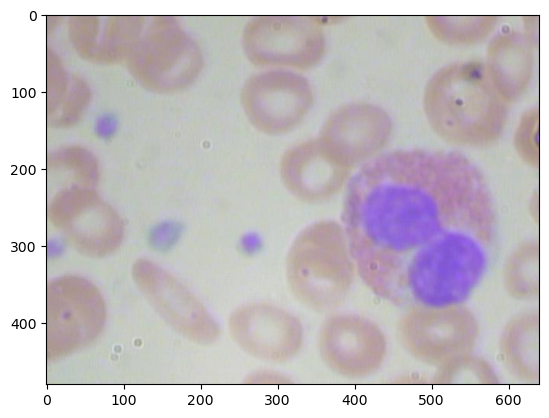

In [17]:
plt.imshow(img_array_np[349])

In [18]:
train_X, test_X, train_Y, test_Y = train_test_split(img_array_np, data_Y_labels_np, train_size = .8, random_state = 50)

In [19]:
import pandas as pd

num_train = pd.Index(train_Y)
num_test = pd.Index(test_Y)
print(num_train.value_counts())
print(num_test.value_counts())

B    715
L    566
M    506
N    155
E     66
Name: count, dtype: int64
B    188
L    127
M    114
N     51
E     22
Name: count, dtype: int64


In [20]:
train_Y_final = one_hot_encoding(train_Y)
test_Y_final = one_hot_encoding(test_Y)

In [21]:
def cnn(initial_shape):
    
    initial_image = tf.keras.Input(initial_shape)
    
    Conv_1  = tfl.Conv2D(11, (5,5), strides = 5, padding = 'same')(initial_image)
    Drop_1  = tfl.Dropout(.1)(Conv_1)
    Relu_1  = tfl.ReLU()(Drop_1)
    MP2D_1  = tfl.MaxPool2D((7,7), strides = 5)(Relu_1)
    
    Conv_2  = tfl.Conv2D(6, (4,4), strides = 2, padding = 'same')(MP2D_1)
    Drop_2  = tfl.Dropout(.1)(Conv_2)
    Relu_2  = tfl.ReLU()(Drop_2)
    MP2D_2  = tfl.MaxPool2D((3,3), strides = 3)(Relu_2)
    
    Conv_3  = tfl.Conv2D(4, (3,3), strides = 1, padding = 'same')(MP2D_2)
    Drop_3  = tfl.Dropout(.1)(Conv_3)
    Relu_3  = tfl.ReLU()(Drop_3)
    MP2D_3  = tfl.MaxPool2D((3,3), strides = 1)(Relu_3)
    
    flat  = tfl.Flatten()(MP2D_3)
    dense = tfl.Dense(5,activation = 'softmax')(flat)
    
    model = tf.keras.Model(inputs = initial_image, outputs = dense)
    
    return model

In [22]:
convolutional_mod = cnn(train_X[0].shape)
convolutional_mod.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
convolutional_mod.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 480, 640, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 96, 128, 11)         │             836 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 96, 128, 11)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 96, 128, 11)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 18, 25, 11)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 9, 13, 6)            │           1,062 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 9, 13, 6)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 9, 13, 6)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 4, 6)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 4, 4)             │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 3, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 2, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │              45 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,163 (8.45 KB)

 Trainable params: 2,163 (8.45 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
print(train_X.shape, train_Y_final.shape)
print(test_X.shape, test_Y_final.shape)

(2008, 480, 640, 3) (2008, 5)
(502, 480, 640, 3) (502, 5)


In [24]:
train_set = tf.data.Dataset.from_tensor_slices((train_X, train_Y_final)).batch(32)

In [25]:
test_set = tf.data.Dataset.from_tensor_slices((test_X, test_Y_final)).batch(32)

In [26]:
hist   = convolutional_mod.fit(train_set, epochs = 300, validation_data = test_set)

Epoch 1/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 158ms/step - accuracy: 0.0947 - loss: 127.7557 - val_accuracy: 0.2888 - val_loss: 2.5443
Epoch 2/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.3103 - loss: 2.9122 - val_accuracy: 0.3167 - val_loss: 1.7720
Epoch 3/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.2975 - loss: 1.9811 - val_accuracy: 0.3247 - val_loss: 1.5770
Epoch 4/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.3277 - loss: 1.6085 - val_accuracy: 0.3486 - val_loss: 1.5239
Epoch 5/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.3537 - loss: 1.5401 - val_accuracy: 0.3924 - val_loss: 1.5020
Epoch 6/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.3569 - loss: 1.5228 - val_accuracy: 0.3367 - val_loss: 1.5035
Epoch 7/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.3184 - loss: 1.5010 - val_accuracy: 0.4104 - val_loss: 1.4710
Epoch 8/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.3682 - loss: 1.4811 - val_

Epoch 51/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.4283 - loss: 1.2964 - val_accuracy: 0.4821 - val_loss: 1.3318
Epoch 52/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.4215 - loss: 1.3010 - val_accuracy: 0.5100 - val_loss: 1.3091
Epoch 53/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - accuracy: 0.4469 - loss: 1.2822 - val_accuracy: 0.4960 - val_loss: 1.3028
Epoch 54/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.4409 - loss: 1.2801 - val_accuracy: 0.4960 - val_loss: 1.3004
Epoch 55/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.4393 - loss: 1.2734 - val_accuracy: 0.5020 - val_loss: 1.2928
Epoch 56/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.4386 - loss: 1.2673 - val_accuracy: 0.5020 - val_loss: 1.2986
Epoch 57/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.4555 - loss: 1.2537 - val_accuracy: 0.5000 - val_loss: 1.3004
Epoch 58/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.4505 - loss: 1.2545

Epoch 101/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.5119 - loss: 1.1404 - val_accuracy: 0.5080 - val_loss: 1.1836
Epoch 102/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.5328 - loss: 1.1015 - val_accuracy: 0.5199 - val_loss: 1.1382
Epoch 103/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - accuracy: 0.5379 - loss: 1.0714 - val_accuracy: 0.5159 - val_loss: 1.1743
Epoch 104/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.5183 - loss: 1.1073 - val_accuracy: 0.3964 - val_loss: 1.3892
Epoch 105/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.4562 - loss: 1.3140 - val_accuracy: 0.5020 - val_loss: 1.2035
Epoch 106/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.4878 - loss: 1.1907 - val_accuracy: 0.5299 - val_loss: 1.1680
Epoch 107/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.5158 - loss: 1.1375 - val_accuracy: 0.5120 - val_loss: 1.2088
Epoch 108/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.4864 - loss:

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.5710 - loss: 1.0552 - val_accuracy: 0.5737 - val_loss: 1.0636
Epoch 151/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.5743 - loss: 1.0363 - val_accuracy: 0.5339 - val_loss: 1.1694
Epoch 152/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.5584 - loss: 1.0748 - val_accuracy: 0.5697 - val_loss: 1.0596
Epoch 153/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.5902 - loss: 1.0207 - val_accuracy: 0.5438 - val_loss: 1.0929
Epoch 154/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.5879 - loss: 1.0370 - val_accuracy: 0.5578 - val_loss: 1.0851
Epoch 155/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.5734 - loss: 1.0436 - val_accuracy: 0.5478 - val_loss: 1.0848
Epoch 156/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.5784 - loss: 1.0169 - val_accuracy: 0.5498 - val_loss: 1.1001
Epoch 157/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.5885 - loss: 0.9951 - val_a

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - accuracy: 0.6074 - loss: 0.9459 - val_accuracy: 0.6036 - val_loss: 0.9750
Epoch 200/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.6140 - loss: 0.9239 - val_accuracy: 0.5857 - val_loss: 1.0046
Epoch 201/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.6117 - loss: 0.9789 - val_accuracy: 0.5717 - val_loss: 1.0235
Epoch 202/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.6249 - loss: 0.9367 - val_accuracy: 0.5996 - val_loss: 0.9757
Epoch 203/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.5967 - loss: 0.9644 - val_accuracy: 0.5837 - val_loss: 1.0204
Epoch 204/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.5962 - loss: 0.9588 - val_accuracy: 0.5837 - val_loss: 1.0214
Epoch 205/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.6105 - loss: 0.9440 - val_accuracy: 0.5936 - val_loss: 0.9953
Epoch 206/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.6187 - loss: 0.9253 - val_

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.6467 - loss: 0.8897 - val_accuracy: 0.6693 - val_loss: 0.8798
Epoch 249/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.6641 - loss: 0.8806 - val_accuracy: 0.6215 - val_loss: 0.9395
Epoch 250/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.6432 - loss: 0.8812 - val_accuracy: 0.6454 - val_loss: 0.9050
Epoch 251/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.6698 - loss: 0.8497 - val_accuracy: 0.6673 - val_loss: 0.8771
Epoch 252/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.6753 - loss: 0.8511 - val_accuracy: 0.6713 - val_loss: 0.8570
Epoch 253/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.6533 - loss: 0.8886 - val_accuracy: 0.6534 - val_loss: 0.9109
Epoch 254/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.6565 - loss: 0.8974 - val_accuracy: 0.6673 - val_loss: 0.8962
Epoch 255/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.6585 - loss: 0.8789 - val_ac

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.7025 - loss: 0.8151 - val_accuracy: 0.7291 - val_loss: 0.8074
Epoch 298/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.7240 - loss: 0.7686 - val_accuracy: 0.7191 - val_loss: 0.8227
Epoch 299/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.7264 - loss: 0.7606 - val_accuracy: 0.7072 - val_loss: 0.8049
Epoch 300/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7225 - loss: 0.7838 - val_accuracy: 0.7112 - val_loss: 0.8117


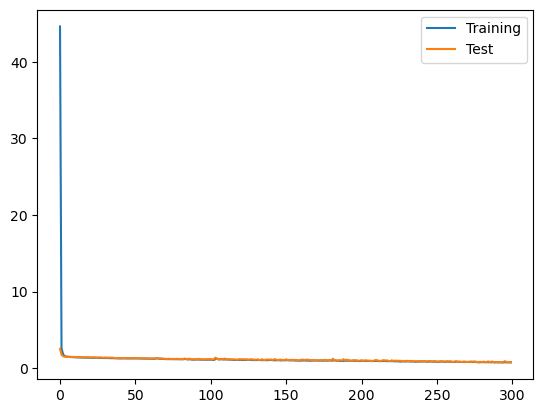

In [27]:
plt.plot(hist.history['loss'], label = 'Training')
plt.plot(hist.history['val_loss'], label = 'Test')
plt.legend()

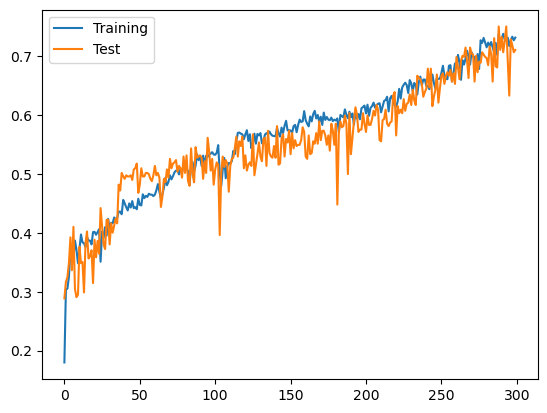

In [28]:
plt.plot(hist.history['accuracy'], label = 'Training')
plt.plot(hist.history['val_accuracy'], label = 'Test')
plt.legend()

Special thanks to DeepLearning.ai for the coursework/syntax help on the CNN structure codes.

Retrieved from DeepLearning.AI (2024, December 25). 

Convolution_model_Application. Retrieved from C4_W1 Graded Assignment 2 in the Deep Learning Specialization

Code for cv2 adapted from: https://www.geeksforgeeks.org/python-opencv-cv2-imshow-method/.

Code for data augmentation adapted from: https://www.geeksforgeeks.org/apply-a-2d-convolution-operation-in-pytorch/ and
https://www.tensorflow.org/tutorials/images/data_augmentation

Thanks to Google AI for help with pandas.